# Training a MLP

## Introduction

**Learning Objectives**
- What occurs during training?  
- What a loss function is and how it is implemented
- How gradient descent updates the model's parameters
- Create a gradient descent optimiser from scratch

Training any machine learning model involves iteratively updating the model's parameters so that its predictions improve over time. We have described neural nets as **deep learning**, which as a direct consequence of the multiple layers contains many, many parameters that need to be fine tuned for the prediction. 

We will first examine what these parameters are, how many there are, and observe how they are updated using *loss functions* and *gradient descent*.

## What is training?

A neural network is fully specified by two main components:

- Its **architecture**, meaning the *number of layers* and the *number of neurons in each layer*
- Its **parameters**, namely the *weights* and *biases* associated with every neuron in the network

This naturally raises an important question: *how many parameters does a typical neural network contain*?

To see where these parameters come from, let us briefly recap:

REMEMBER BOX

- Every *connection* between two neurons has an associated *weight* $w$
- Every *neuron* has its own *bias term* $b$
- Each *layer* usually contains *many neurons*

Thus, even relatively small networks can contain a surprisingly large number of parameters. 

### Worked example

Let us revisit our example of using a neural network (MLP) to classify handwritten digits. As we will be using this very problem to test out a model in the next section, we can expand a bit further on the dataset. Our digits are stored in a dataset called **MNIST**, which are small greyscale images of handwritten digits with a resolution of $28 \times 28$ pixels. This results in 784 pixel values, each representing the intensity of ink at a particular location in the image. Before being passed to the network, each image is *flattened* into a one-dimensional vector of length 784, with each value becoming the input to a corresponding neuron in the input layer, as we learned previously. The role of the network is then to transform these 784 input values into a prediction over the 10 possible digit classes.

To solve this problem we create a network that consists of an **input layer** with 784 neurons (one for every pixel value), two **hidden layers** containing 16 neurons each, and an **output layer** with 10 neurons, one for each digit class from 0 to 9.

Despite its modest size, this network already contains **13,002 parameters** in total, which is calculated as follows:

- Hidden layer 1 contains $784 \times 16$ weights and 16 biases - **12,960 parameters**
- Hidden layer 2 contains $16 \times 16$ weights and 16 biases - **272 parameters**
- The output layer contains $16 \times 10$ weights and 10 biases - **170 parameters**

While this would be considered a very small network by current standards, it still represents a substantial number of values that must be learned and is one of the reasons why neural networks took so long to take off. There simply wasn't good enough hardware or algorithms to train networks of any meaningful size.

REMEMBER BOX

Note that neurons in the input layer do not have weights or biases, as they simply hold the input values.

If we could choose an ideal set of parameters, feeding an image into this network - for example a handwritten **3** - would result in the transformations across the layers producing the highest output score for the neuron corresponding to the correct class.

The challenge, therefore, becomes determining these ideal weights and biases. This is fundamentally an **optimisation problem**, where we are seeking the set of parameters that minimises the error the network makes when recognising digits.

Determining these optimal parameters is precisely what happens during **training**, which we will discuss, next.

## The training dataset

During training, we present the network with *labelled data*. Data is described as labelled when, for each input, we also provide a corresponding label that represents the correct answer to the task we want the network to learn.

In the handwritten digit example, the input is an image of a digit, while the label specifies which digit the image represents. These labels are often referred to as **ground truth**, as they encode the true answer rather than a model prediction.

KEY TERMS BOX

**Ground truth** refers to the true, correct labels or values associated with data, typically obtained from reliable measurements, annotations, or expert knowledge. In machine learning, ground truth provides the reference against which a model’s predictions are compared during training and evaluation.

![Fig. 4: Intuition behind the training procedure.](./images/Fig_training.png)

In this setting, we are working with **supervised learning**, a widely used machine learning paradigm in which models learn from labelled examples. While supervised learning is extremely powerful, it is important to also remember that there are other learning approaches that do not rely on labelled data. We will visit an approach to this in **AI4** through **language models**.

For each labelled example, the network first performs a standard **forward pass**, processing the input through all layers to produce a prediction. At this stage, the label is not yet used. Only once the prediction has been generated is it compared to the ground-truth label to measure how accurate the output is. Based on this comparison, the network’s weights and biases are adjusted so that its prediction for similar inputs improves in future passes. Over time, this process encourages the network’s predictions to become *increasingly close to the true labels*.

KEY TERMS BOX 

The **forward pass** is the process of passing the input data through the network to generate the output. Typically this is followed by a **backward pass** where the error is calculated and the weights are adjusted to minimise the error.

For more information on the forward pass computation head to the [Further Reading](./further-reading.html#training-a-mlp-resources) section.

The full collection of labelled examples presented to the network during learning is referred to as the **training set**. The aim is not simply to perform well on this data, but to learn patterns that generalise beyond it.

In practice, labelled data are therefore split into three parts: a **training set**, a **validation set**, and a **test set**. 

Each subset of the data serves a unique purpose:

| Split | Purpose | Proportion of Total Data | Usage Frequency |
| ----- | ------- | ------------------------ | --------------- |
| **Training set** | Used to train the model. | ~60-80% | Always |
| **Validation set** | Used to fine-tune the model & track training. | ~10-20% | Often, but not always |
| **Testing set** | Used to evaluate the model’s performance, providing an indication of how well it has learned. | ~10-20% | Always |

This split should be performed at the very beginning of a project, to ensure your model's **generalisability**.

NOTE BOX

The **test** set can sometimes be called the *hold out* set, as it is always "held back" from training to prevent it influencing the model setup or training. If it does, this is called **data leakage**.

### Training as an optimisation problem:

Before we proceed, there are two important aspects of the training process that we must clarify. Firstly: how exactly do we compare predictions and labels? We will capture this with the concept of the **loss function**.

Secondly, how do we update the values of the weights and biases of the network, so that the network makes better predictions in future passes? We will achieve this by optimising the values of the weights and biases using a method called **gradient descent**. Both have been defined generally, earlier in this lesson, but we will now delve a little further.

## The loss function

As we briefly defined above, the **loss function** provides a *quantitative measure of how well a particular set of weights and biases enables a network to perform its task*. In the simplest terms, it tells us *how good* the current model is. Elsewhere, you may also encounter the loss function being referred to as the *cost function* or *objective function*; these terms are often used interchangeably, and refer to the same thing.

The loss function is evaluated at the end of the *forward pass*. Once the network has produced an output for a given input, the loss function *compares this output to the corresponding ground truth* and returns a *single numerical value representing the error*. 

- Smaller loss values indicate better performance. 
- Larger values indicate poorer performance. 

### Training goals:

During training, the goal is to adjust the network’s parameters so as to minimise this loss.

In this lesson, we will focus on the **cross-entropy loss**, which is a standard and widely-used choice for *multi-class classification* problems, the problem we face with handwritten digit recognition.

Alongside cross-entropy, we will encounter other loss functions in the examples we have chosen. These are:

- The **mean squared error loss**, which is commonly used in regression problems
- The **negative log-likelihood loss**, which is closely related to cross-entropy and differs mainly in how model outputs are represented

NOTE BOX

In PyTorch, the difference between cross-entropy loss and negative log-likelihood loss is reflected in the required preprocessing of model outputs. `CrossEntropyLoss()` takes raw, unnormalised prediction scores and internally applies both softmax (see below) and logarithm operations. Contrastingly, `NLLLoss()` assumes that the model itself has already converted outputs into log-probabilities, typically using a log-softmax layer.

We will see this in practice later in the lesson.

### Cross-entropy Loss

To compute the cross-entropy loss, two pieces of information are required:

- The *network’s predictions*, expressed as a probability distribution over the possible classes.
- The *ground-truth labels*, also expressed as a probability distribution.

*We will run through these in the sub-section below.*

The key intuition behind cross-entropy loss is that it measures how different the predicted probability distribution is from the true distribution. 

- When the model assigns high probability to the correct class, the loss is low. 
- When probability mass is assigned to incorrect classes, the loss increases. 

In this way, cross-entropy directly encourages the model to place as much confidence as possible on the correct outcome. A more detailed probabilistic treatment of cross-entropy can be found in the [Further Reading](./further-reading.html#training-a-mlp-resources) section.

## The softmax function

Let us now walk through how these quantities are computed in the context of handwritten digit classification.

At the end of the *forward pass*, the network reaches the **output layer**. Each neuron in this layer corresponds to one possible digit class and holds a numerical score indicating how strongly the network associates the input image with that class.

Ideally, the neuron corresponding to the correct digit should produce the highest score. However, at this stage these outputs are simply *raw, unnormalised scores*. They are not probabilities, and they are not directly comparable in a meaningful probabilistic sense. In practice, these outputs are called **logits**: raw, unnormalised scores produced by the final layer before softmax converts them into probabilities.

To convert these raw scores into a form that is easier to interpret, we apply the **softmax function**. The softmax function takes a vector of $K$ real-valued scores and transforms them into a *probability distribution* over the $K$ classes. After applying softmax:
- each output value lies between 0 and 1
- the values across all output neurons sum to 1

We can expand on this with a simple visualisation of a softmax transformation given some dummy unnormalised logits. See the docstring of the softmax function for the maths behind it.

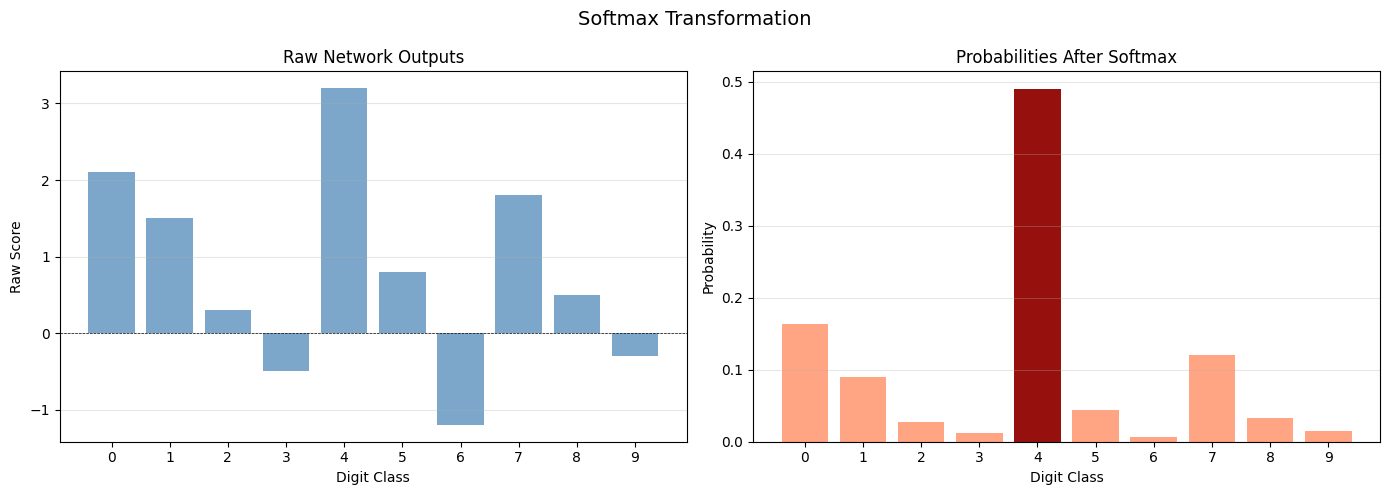

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The softmax function converts a vector of numbers into a probability distribution
def softmax(z):
    """
    Compute softmax values for a vector z.
    The exponential ensures all values are positive,
    and dividing by the sum ensures they sum to 1.
    """
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability with exponentials
    return exp_z / exp_z.sum()

# Demo raw output scores from a neural network's final layer
# These represent the network's raw, unnormalised logits before being converted to probabilities
raw_scores = np.array([2.1, 1.5, 0.3, -0.5, 3.2, 0.8, -1.2, 1.8, 0.5, -0.3])

# Apply softmax to convert to probabilities
probabilities = softmax(raw_scores)

# Create a bar plot showing the transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: raw scores
digits = np.arange(10)
ax1.bar(digits, raw_scores, color='steelblue', alpha=0.7)
ax1.axhline(y=0, color='k', linestyle='--', lw=0.5)
ax1.set_xlabel('Digit Class')
ax1.set_ylabel('Raw Score')
ax1.set_title('Raw Network Outputs')
ax1.set_xticks(digits)
ax1.grid(True, alpha=0.3, axis='y')

# Right plot: probabilities after softmax
ax2.bar(digits, probabilities, color='coral', alpha=0.7)
ax2.axhline(y=0, color='k', linestyle='--', lw=0.5)
ax2.set_xlabel('Digit Class')
ax2.set_ylabel('Probability')
ax2.set_title('Probabilities After Softmax')
ax2.set_xticks(digits)
ax2.grid(True, alpha=0.3, axis='y')

# Highlight the highest probability
predicted_class = np.argmax(probabilities)
ax2.bar(predicted_class, probabilities[predicted_class], color='darkred', alpha=0.9)

fig.suptitle('Softmax Transformation', fontsize=14)
plt.tight_layout()
plt.show()

The resulting distribution above represents the network's predicted probabilities for each class. Notice how softmax preserves the ordering of the raw scores. That is, the largest input produces the largest probability, but it is transformed into a proper probability distribution where all values sum to 1.

The softmax function is non-linear and, in multi-class classification problems, serves as the *activation function* of the output layer. It is important to emphasise that softmax is **not** a loss function. Rather, it is a *necessary transformation* that converts the network's raw outputs into probabilities, preparing them for loss computation.

At this point, the network's predictions are expressed as probabilities over the possible classes. To compute a loss, we must express the **ground truth** in the same probabilistic form. This is done using a *one-hot encoded* vector: a target probability distribution that assigns a value of 1 to the correct class and 0 to all others. For example, if the true digit is `4`, the target distribution would be `[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]`.

## Cross entropy loss

With both the predicted distribution (from softmax) and the ground-truth distribution (one-hot encoded) defined, we can now compute the **cross-entropy loss**, which measures how different these two distributions are. The cross-entropy loss is given by:

$$H(p,q) = - \sum_{i} p_i \log(q_i)$$

where $p_i$ represents the true probability for class $i$ (either 0 or 1 in one-hot encoding) and $q_i$ represents the network's predicted probability for that class. The overall loss is zero only if $p = q$ (i.e. the predicted distribution is exactly the same as the true distribution); as $\log(1) == 0$.

For a single input image, the cross-entropy loss evaluates to a **single scalar value that quantifies prediction error**. Because most terms in the sum are zero (due to the one-hot encoding), the loss effectively reduces to:

$$-\log(q_{\text{true}})$$

where $q_{\text{true}}$ is the predicted probability for the correct class, from the softmax output of the network. This means the loss is smallest when the model assigns probability close to 1 to the correct class. Mathematically, for a one-hot target, the loss is $-\log(q_{\text{true}})$: it equals 0 when $q_{\text{true}}=1$, and increases rapidly as $q_{\text{true}}$ approaches 0.

PRACTICE EXERCISE

Use the `get_loss()` function below to explore how cross-entropy loss behaves and why it effectively reduces to $-\log(q_{\text{true}})$ when summed over all classes. The function takes two arguments: the ground truth probability (0 or 1 from one-hot encoding) and the predicted probability (a value between 0 and 1 from softmax).

In [2]:
# Download this notebook and use this function to calculate the loss for a single prediction.

from math import log

encoded_truths = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

def get_loss(encoded_proba, prediction_proba):
    return - encoded_proba * log(prediction_proba)

### Calculating loss for the whole dataset

When training a network, the loss is not computed for just one image, but across an entire dataset. Thus, the *overall loss* is defined as the **average loss** over all training samples:

$$Loss = \frac{1}{N} \sum_{n=1}^{N} H(p^{(n)}, q^{(n)})$$

Here $N$ is the number of training samples, and we are simply finding the average of $H(p^{(n)}, q^{(n)})$ over all samples by summing them up and dividing by $N$.

In practice, datasets can be very large, and computing this average over every sample at each training step would be computationally expensive. For this reason, training is often performed using only a small subset of samples at a time—an approach known as *mini-batch training*—which we will using for training throughout this module.

NOTE BOX

In the context of neural networks, you may also encounter the term *cost function* used interchangeably with *loss function*. Similarly, whilst we focus on cross-entropy loss here, other loss functions such as *sum of squared errors* follow exactly the same optimisation principles, which we will cover in the next section.

## Gradient descent

Now we know how to calculate the error or *loss*, we can turn to the second and final component of the training process: **optimising the weights and biases**. More explicitly, updating the network's parameters so as to improve its performance. 

### Understanding the descent with loss:

The core algorithm used for this optimisation is called **gradient descent**. The fundamental idea is straightforward: we want to adjust the network's parameters (*weights and biases*) to make the loss as small as possible. To understand how this works, it is easiest to start with a simple one-dimensional analogy.

Suppose we have a function $f$ with a single input $x$ and a single output $y = f(x)$. Our goal is to find the value of $x$ that minimises $f(x)$. That is, the value of $x$ that makes $f(x)$ as small as possible. You can think of $f$ as representing our loss function, and $x$ as representing a single parameter in our network. Just as we want to find the $x$ that gives the smallest $f(x)$, we want to find the weights and biases that give the smallest loss.

Gradient descent proceeds as follows:
- We start from an initial value of $x$, typically chosen at random, and compute the derivative of the function at that point, $\frac{df}{dx}$. The derivative at a given point corresponds to the slope of the line tangent to the curve at that location. This slope tells us how the function value changes locally as $x$ varies.
- By taking a small step in $x$ in the direction opposite to this gradient (moving "downhill"), we move to a new point $x'$ where the function value should be lower.
- We then repeat this process iteratively, recomputing the derivative and updating $x$ each time, gradually moving towards a minimum.

See the diagram below for an illustration of this process:

![Fig. 5: Diagram of gradient descent in 1D.](./images/Fig_gradient_descent_1d.png)

If the step size is chosen to be proportional to the slope, the updates naturally become smaller as we approach the minimum, because the slope flattens near that point. This helps prevent overshooting the minimum.

The idea of the gradient generalises this intuition to higher dimensions. Instead of a curve, we can now consider a function of many inputs and a single output, such as a loss function. This function can be visualised as a *surface*, where each point corresponds to a particular set of input values and a corresponding output value.

The **gradient** of this function at a given point is a *vector* that points in the direction of the *steepest increase of the function*. In the case of a neural network, the inputs to the loss function are the network’s **weights and biases**, and the output is the **loss value**. The gradient therefore tells us, for each parameter, how changing it would increase the loss most rapidly.

Since our objective is to *reduce* the loss, we update the parameters in the *opposite direction*. Taking the **negative of the gradient** moves the parameters in the direction where the loss decreases most steeply.

A simple parameter update rule can be written as:

![Fig. 6: A simple rule to update the weights and biases $W$ of the network.](./images/Fig_parameter_update_equation.jpeg)

Here, $W_{old}$ denotes the **current set of parameters**, $W_{new}$ the **updated parameters**, $\alpha$ is the **learning rate**, which controls the *size* of each update step, and $\nabla L$ is the **gradient of the loss** with respect to the network’s parameters.

### Other methods:

Whilst this update rule captures the core idea of gradient descent, in practice, it is rarely used directly. More sophisticated optimisation methods build on this principle to improve stability and convergence speed.

**Momentum-based methods** accumulate a moving average of past gradients, helping the optimiser build velocity in consistent directions and smooth out noisy updates. **RMSprop** (Root Mean Square Propagation) adapts the learning rate for each parameter individually based on the magnitude of recent gradients, which helps when different parameters need different step sizes. **Adam** (Adaptive Moment Estimation) combines both of these ideas: it maintains both momentum and adaptive learning rates, making it one of the most popular optimisers in practice due to its robustness across different types of problems. For most applications, Adam is a sensible default choice.

### Adding stochasticity:

In principle, a parameter update could be performed after computing the loss over the entire training dataset. However, this is often computationally expensive. Instead, updates are typically performed using only a small random subset of the data at a time. This approach is known as **stochastic gradient descent (SGD)**, and surprisingly, updating parameters based on noisy estimates from small batches often leads to better generalisation than using the full dataset. 

If you'd like to learn more about the other optimisation methods or stochastic descent with mini batching this then head to our [Further Reading](./further-reading.html#training-a-mlp-resources) section.

NOTE BOX 

It is important to note that Adam and RMSprop also use stochastic gradient descent in practice—that is, they compute parameter updates based on mini-batches rather than the full dataset. The distinction between these optimisers lies not in *whether* they use mini-batches, but in *how* they compute the update step itself.

For the model example the SGD optimiser will be used.

## Gradient Descent Walkthrough

We have now covered the main ideas behind the training process, we eill now put this into practice!

We have seen in the previous section how in gradient descent, we use the gradient of the loss function to update the weights and biases of the network, so that each subsequent forward pass the loss is **decreased**. In this example, we will inspect how we can compute the gradient of a simple function in PyTorch, mimicking the gradient descent process.

### Simple derivative:

Take the following function $y = 2x^3 + x + 1$. Can you compute its derivative by hand $dy/dx$ and evaluate it at $x = 2$?

**Solution:**

$$dy/dx = 6x^2 + 1$$

$$dy/dx (x=2) = 25$$

We can now confirm whether the **PyTorch** approach does exactly the same. 

To import **PyTorch** we use the following code:

In [3]:
import torch # this is the PyTorch module

import matplotlib.pyplot as plt

import numpy as np

REMEMBER BOX

**PyTorch** is an open-source machine learning framework for Python that provides tools for building, training and deploying neural networks. It combines efficient tensor computation with automatic differentiation, allowing models to be defined and optimised in a flexible and intuitive way.

There are a number of sub-modules that we will be using later on, but for now we will just import the main module, as well as Matplotlib and Numpy.

First, we define a PyTorch tensor $x$, which represents the input value at which we want to evaluate the function and its gradient.

In [4]:
# define a tensor for x, and 
# set requires_grad to True: this indicates to PyTorch that we plan to compute the gradient of this tensor
x = torch.tensor(data=2.0, requires_grad=True)

KEY TERMS BOX

A **PyTorch tensor** is equivalent to a NumPy array in that both represent multi-dimensional arrays of numbers. However, tensors offer additional capabilities essential for deep learning: they can automatically track gradients for differentiation (enabling backpropagation), and they can be moved to GPUs for accelerated computation. 

TIP BOX

Head to the [Artificial Intelligence](../AI0/tensors.html) orientation material for a more thorough introduction and guide to tensors.

We then compute the gradient of $y$ with respect to $x$, $dy/dx$ using the `backward()` method. The name "backward" refers to the back-propagation algorithm, which is the way we implement the gradient computation.

In [5]:
# define the function y; the double asterisk denotes 'to the power of'.
y = 2*x**3 + x + 1

# calculate the gradient of y with respect to x:
y.backward()

# Assign the gradient (dy/dx) to a variable, and print:
dy_dx = x.grad
print(f'dy/dx for x = 2: {dy_dx}')

dy/dx for x = 2: 25.0


We have now computed the gradient of the function that represents the computation of a single neuron!

### Gradient descent:

Now we can create a simple example of how gradient descent works.

As we have seen, gradient descent is an optimisation algorithm used to train neural networks, although it has a wider use than that. Its goal is to find the values that minimise a function. It does so iteratively, by updating the input value $x$ following a certain rule. In deep learning, the function we are trying to minimise is the ***loss function***, which as we know takes as inputs the weights and biases of the neural network.

Our goal then is to find the weights and biases that *minimise the loss function*. That is, we want to determine the parameters of the network that minimise the difference between the prediction of the neural network and the ground-truth.

Gradient descent tells us to take the gradient of the loss function with respect to the weights and biases, and then to update the values of these parameters following the negative of the gradient. This is equivalent to computing the derivative of the loss with respect to each of the weights and biases in the network, and adjusting their values accordingly.


First we define a simple function $y$:

$$y = x^2$$

From visual inspection we can see the minimum of this function is at $x$ = 0

In [6]:
# Plot a x^2 function:
x = np.arange(-2, 2.1, 0.1)
y = x**2
plt.plot(x, y)
plt.xlabel('Input x')
plt.ylabel('Output y')
# Using matplotlib.pyplot's annotate function, label the minimum with a black arrow, and text label, as follows:
plt.annotate('Minimum', xy=(0, 0), xytext=(0, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

We can now define a Python function to implement the *gradient descent* algorithm that takes as inputs the input $x$, a specified learning rate (a step size for the gradient descent), and a fixed number of iterations.

The function below is a *manual* implementation of **PyTorch's** training process

In [ ]:
# A function that starts with a random value for x, and then iteratively updates x using the gradient descent algorithm:
def gradient_descent(x, learning_rate, n_iterations):

    learning_rate = torch.tensor(learning_rate) # Convert the learning rate to a tensor
    x_list = []
    for c, i in enumerate(range(n_iterations)):
        
        # Define the function y:
        y = x**2
        # Calculate the gradient of y with respect to x:
        y.backward()
                
        # Here we use with torch.no_grad() to prevent PyTorch from tracking the gradient calculation,
        # as we are doing it manually ourselves above
        # When we use the optimisers later, this tracking will be handled automatically

        with torch.no_grad():
            # This is our equation in Fig 6, 
            # updating the parameters by subtracting the gradient * learning rate
            x -= learning_rate * x.grad 
            
            if c % 10 == 0 or c == n_iterations - 1:
                print(f'x at iteration {i}: {x}') # Print the updated value of x every 10 iterations

            x_list.append(x.item()) # Append the updated value of x to the list
            x.grad.zero_() # Set the gradient to zero, otherwise it will accumulate

    return x, x_list

We can now call the `gradient_descent` function to find the $x$ value at which $y$ is minimum. In this case we will have it run for **150 iterations**, with a learning rate of **0.1**.

In [8]:
# Define a tensor for x, make it a scalar, and set requires_grad to True:
x = torch.tensor(20.0, requires_grad = True)

# Call the gradient_descent function:
x, x_list = gradient_descent(x, learning_rate=0.1, n_iterations=150)

x at iteration 0: 16.0
x at iteration 10: 1.7179867029190063
x at iteration 20: 0.18446743488311768
x at iteration 30: 0.019807040691375732
x at iteration 40: 0.0021267649717628956
x at iteration 50: 0.0002283596695633605
x at iteration 60: 2.4519937142031267e-05
x at iteration 70: 2.6328082185500534e-06
x at iteration 80: 2.826956517765211e-07
x at iteration 90: 3.035421158870122e-08
x at iteration 100: 3.2592588627977648e-09
x at iteration 110: 3.4996022746369704e-10
x at iteration 120: 3.7576691758189895e-11
x at iteration 130: 4.034766444560578e-12
x at iteration 140: 4.3322975957528487e-13
x at iteration 149: 5.814711776311321e-14


We can see the value of $x$ decrease with each iteration, down to a minimum of $5.814711776311321e-14$.

In the code snippet below, we plot the value of $x$ at each optimisation step with a red star, to visualise how the optimisation progresses:

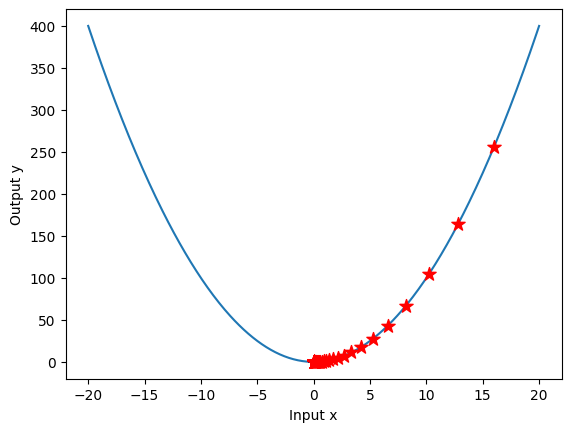

In [9]:
# Plot the function y = x^2:
x = np.arange(-20, 20.1, 0.1)
y = x**2
plt.plot(x, y)

# Plot the values of x that were updated during gradient descent, make each point a red star and overlay it onto

y_values = [i**2 for i in x_list] # create the y values given the function y = x^2

plt.scatter(x_list, y_values, color='red', marker='*', s=100, zorder=10)
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.show()

In the plot above and in the printout of the values, we can see how the values of $x$ considered during the optimisation converge to the true minimum $x=0$. The steps between values of $x$ also becomes smaller, as expected since the parameters' update is proportional to the slope.

Plotting the value of $x$ over iterations shows the **optimisation trajectory**. We can see $x$ converging toward the minimiser, with step sizes shrinking as gradients become smaller near the minimum. Here, $x$ decreases rapidly at first and then more gradually, because the gradient magnitude *shrinks* as we approach the minimum. We can see that already with around 30 iterations we get a decent estimate.

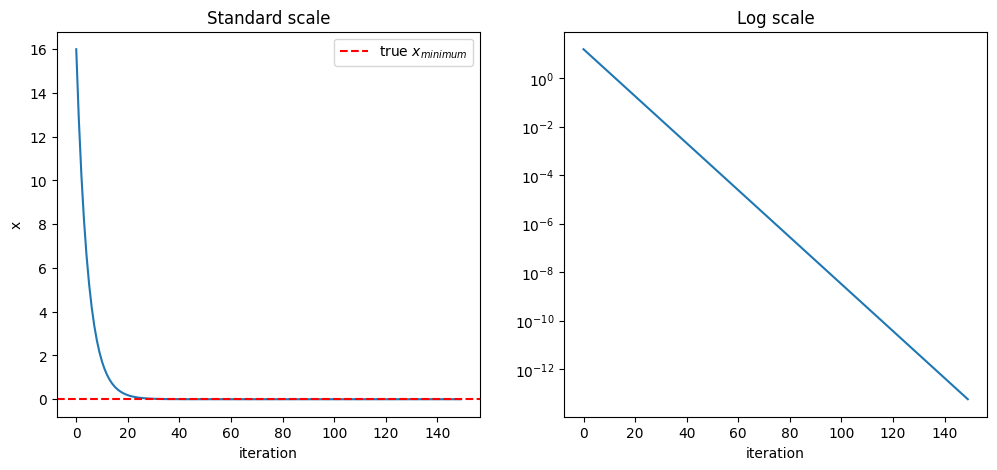

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(x_list)
axes[0].axhline(y=0, color='r', linestyle='--', label='true $x_{minimum}$')
axes[0].set_xlabel('iteration')
axes[0].set_ylabel('x')
axes[0].legend()
axes[0].set_title('Standard scale')

axes[1].plot(x_list)
axes[1].set_yscale('log') # Set the y scale to log
axes[1].set_xlabel('iteration')
axes[1].set_title('Log scale')


plt.show()

PRACTICE EXERCISE

The behaviour of gradient descent depends largely on two factors: the **learning rate** and the **initial value** of the parameter. 

1. Using the `gradient_descent` function above, experiment with **three** different learning rates, 0.01, 0.1, 0.5, whilst keeping the starting point fixed at `x = 20.0`. Observe the value of $x$ over the iterations.

2. Next, fix the learning rate at `0.1` and try **three** different starting positions, some positive, some negative, some close to zero. Observe the value of $x$ over the iterations.

3. Modify the `gradient_descent` function to optimise a different function:

$$y = x^4 - 4x^2 + x + 2$$

This function has multiple local minima. Start from `x = 3.0` with `learning_rate = 0.1` and then with `x = - 3.0`. Observe the value of $x$ over the iterations. Only set 50 iterations.

In [11]:
# Download this notebook and write your code here.

## Summary

In this lesson, we explored how neural networks learn through training. We examined how the **cross-entropy loss** quantifies the difference between predicted probabilities (produced by the softmax function) and ground-truth labels (represented as one-hot encoded vectors), providing a single scalar measure of prediction error. We then investigated **gradient descent**, the fundamental optimisation algorithm that adjusts network parameters to minimise this loss. By computing gradients—which indicate how each parameter affects the loss—and taking small steps in the direction that reduces error, the network iteratively improves its predictions.